<a href="https://colab.research.google.com/github/AlekhyaGangopadhyay/My_ML_Projects/blob/main/Burnt_Calorie_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
calorie_data=pd.read_csv('/content/calories.csv')
exersice_data=pd.read_csv('/content/exercise.csv')

In [3]:
calorie_data.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
exersice_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [5]:
calorie_data=pd.concat([exersice_data, calorie_data['Calories']],axis=1)

In [6]:
calorie_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [7]:
calorie_data.shape

(15000, 9)

In [8]:
calorie_data.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


#**Data Visualization**

In [9]:
sns.set()

<Axes: xlabel='count', ylabel='Gender'>

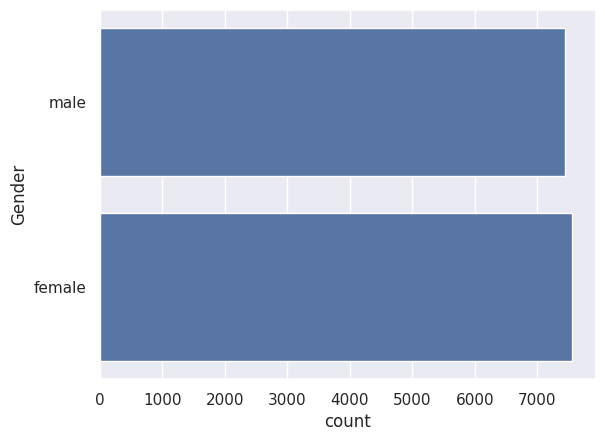

In [10]:
sns.countplot(calorie_data['Gender'] )

<ipython-input-11-83ca6cc8b2e9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calorie_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

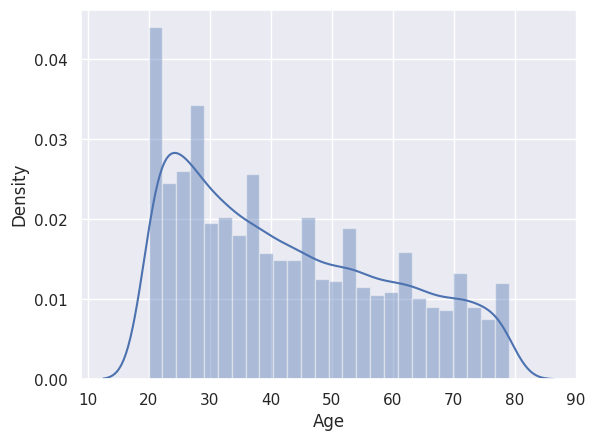

In [11]:
sns.distplot(calorie_data['Age'])

<ipython-input-12-282d5192d570>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calorie_data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

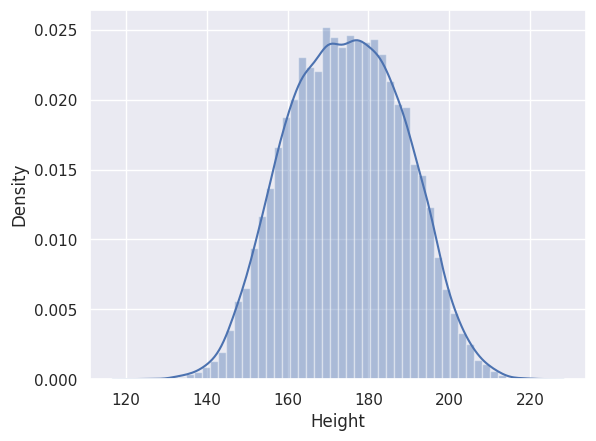

In [12]:
sns.distplot(calorie_data['Height'])

<ipython-input-13-f69895020289>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calorie_data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

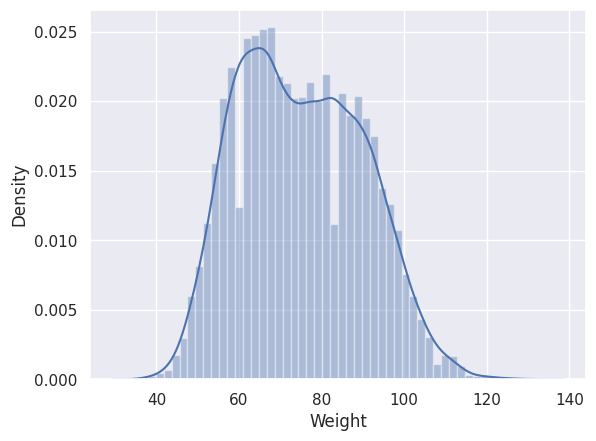

In [13]:
sns.distplot(calorie_data['Weight'])

In [14]:
calorie_data=calorie_data.replace({'Gender':{'male': 0,'female':1}})

<ipython-input-14-4cc75db17d12>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  calorie_data=calorie_data.replace({'Gender':{'male': 0,'female':1}})


**Correletion**

In [15]:
correletion= calorie_data.corr()

<Axes: >

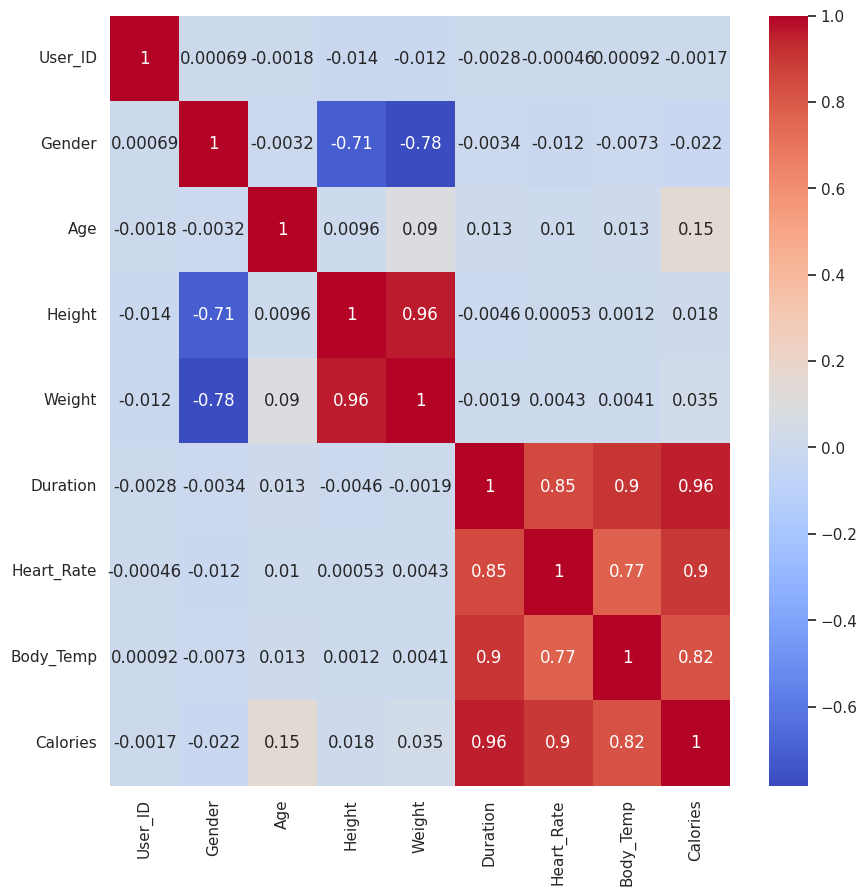

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(correletion,annot=True,cmap='coolwarm')

In [19]:
x=calorie_data.drop(columns=['User_ID','Calories'],axis=1)
y=calorie_data['Calories']

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [25]:
print(x.shape,x_train.shape,x_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [26]:
model=XGBRegressor()

In [27]:
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [28]:
test_prediction=model.predict(x_test)

In [29]:
print(test_prediction)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


In [30]:
error=metrics.mean_absolute_error(test_prediction,y_test)

In [33]:
print(f"The Mean Absolute Error is : {error}.")

The Mean Absolute Error is : 1.4833678883314132.
